# 📊 Análisis de Datos con Pandas, Numpy y Matplotlib
Este notebook contiene ejercicios prácticos para aprender a manejar datos, realizar análisis estadístico y visualizar información usando Python.

💡 **Objetivo**: Comprender las herramientas fundamentales para el análisis de datos en ciencia de datos mediante ejemplos prácticos.

---

# 📊 Consideraciones sobre las Variables del Dataset

Este dataset que veremos hoy contiene información de pacientes con características médicas que pueden influir en la **predicción de diabetes**. A continuación, se describen cada una de las variables, su importancia y consideraciones a tomar en cuenta para su análisis.

---

## 🔹 **1. Pregnancies (Número de Embarazos)**
- **Descripción:** Indica la cantidad de veces que una paciente ha estado embarazada.
- **Tipo de dato:** **Numérico entero** (0, 1, 2, …).
- **Consideraciones:**
  - Solo aplica a **mujeres**, por lo que en un dataset mixto podría ser irrelevante.
  - Un mayor número de embarazos puede estar asociado con un mayor riesgo de diabetes gestacional.

---

## 🔹 **2. Glucose (Glucosa en sangre)**
- **Descripción:** Nivel de glucosa en plasma (mg/dL) tras una prueba de tolerancia a la glucosa en ayuno.
- **Tipo de dato:** **Numérico continuo**.
- **Consideraciones:**
  - Es una de las **variables más relevantes** para detectar diabetes.
  - Valores altos (>125 mg/dL) pueden indicar **diabetes o prediabetes**.
  - Si hay valores de **0 o extremadamente bajos**, podrían representar **datos faltantes**.

---

## 🔹 **3. BloodPressure (Presión Arterial)**
- **Descripción:** Medición de la presión arterial diastólica (mmHg).
- **Tipo de dato:** **Numérico continuo**.
- **Consideraciones:**
  - Valores **muy bajos** (cercanos a 0) pueden representar datos faltantes o errores.
  - La **hipertensión** es un factor de riesgo común en la diabetes tipo 2.

---

## 🔹 **4. SkinThickness (Grosor del Pliegue Cutáneo)**
- **Descripción:** Grosor de los pliegues cutáneos en el tríceps (mm), usado como estimación de la grasa corporal.
- **Tipo de dato:** **Numérico continuo**.
- **Consideraciones:**
  - Puede ayudar a estimar la **obesidad**, que es un factor de riesgo para la diabetes.
  - Valores **cercanos a 0** podrían ser datos faltantes.

---

## 🔹 **5. Insulin (Nivel de Insulina en Sangre)**
- **Descripción:** Cantidad de insulina en suero después de una prueba de tolerancia a la glucosa (mu U/ml).
- **Tipo de dato:** **Numérico continuo**.
- **Consideraciones:**
  - Es clave para entender la **resistencia a la insulina**.
  - Valores **muy bajos o iguales a 0** pueden indicar que faltan datos.
  - La insulina anormal puede indicar **diabetes tipo 1 o tipo 2**.

---

## 🔹 **6. BMI (Índice de Masa Corporal - IMC)**
- **Descripción:** Relación entre peso y altura, calculado como:
  
  $$
  IMC = \frac{\text{Peso (kg)}}{\text{Altura (m)}^2}
  $$

- **Tipo de dato:** **Numérico continuo**.
- **Consideraciones:**
  - Un **IMC alto (>30)** es un fuerte predictor de diabetes tipo 2.
  - Si hay valores **cercanos a 0 o irreales**, podrían ser datos erróneos.

---

## 🔹 **7. DiabetesPedigreeFunction (Historial Familiar de Diabetes)**
- **Descripción:** Mide la **probabilidad genética** de desarrollar diabetes basada en antecedentes familiares.
- **Tipo de dato:** **Numérico continuo** (valor entre 0 y 2.5 aprox.).
- **Consideraciones:**
  - Un **valor alto** indica mayor **riesgo hereditario** de diabetes.
  - Un **valor bajo** sugiere menor riesgo pero no excluye la posibilidad de desarrollar la enfermedad.

---

## 🔹 **8. Age (Edad)**
- **Descripción:** Edad del paciente en años.
- **Tipo de dato:** **Numérico entero**.
- **Consideraciones:**
  - **Personas mayores tienen un mayor riesgo** de desarrollar diabetes.
  - Si hay valores **muy bajos (menores de 10 años)** pueden ser **errores en los datos**.
  - Se puede agrupar en **rangos de edad** para analizar tendencias.

---

## 🎯 **Consideraciones Generales para el Análisis**
✔ **Revisar si hay valores nulos o inusuales (como 0 en glucosa o presión arterial).**  
✔ **Identificar outliers que puedan afectar la interpretación (por ejemplo, valores de insulina extremadamente altos o bajos).**  
✔ **Estandarizar unidades y escalas antes de aplicar modelos para hacer predicciones**  
✔ **Usar histogramas y mapas de calor para detectar correlaciones y anomalías.**  

📊 **Este dataset es ideal para análisis de predicción de diabetes y machine learning, pero requiere preprocesamiento adecuado para evitar sesgos.** 🚀


## 📂 Bloque 1: Carga y Exploración de Datos
En este bloque, aprenderemos a cargar datos desde un archivo CSV utilizando `pandas` y exploraremos su contenido.

**Conceptos clave:**
- Lectura de archivos con `pandas`.
- Exploración de las primeras filas con `.head()`.
- Identificación de valores nulos con `.info()`.
- Estadísticas básicas con `.describe()`.

In [295]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("diabetes2.csv")

# Mostrar las primeras 10 filas
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [296]:
# Mostrar información sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [297]:
# Mostrar estadísticas descriptivas del DataFrame
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 📊 Interpretación de ejemplo: Desviación Estándar de Glucosa: 31.95 mg/dL

La **desviación estándar (σ)** mide la **variabilidad** de los valores de glucosa con respecto a su **media**. En este caso, la desviación estándar de **31.95 mg/dL** indica cuánto se **dispersan los niveles de glucosa** en la población analizada.

---

## 🔹 ¿Qué significa este valor?
1️⃣ **Una desviación estándar de 31.95 mg/dL significa que, en promedio, los valores de glucosa se alejan 31.95 unidades de la media.**  
   - Si la **media de glucosa** en el dataset es, por ejemplo, **120 mg/dL**, entonces la mayoría de los datos estarán **entre 88.05 mg/dL y 151.95 mg/dL** (restando la desviación para 88, sumandola para 151).  

2️⃣ **Indica que hay una variabilidad considerable en los valores de glucosa.**  
   - No todos los pacientes tienen niveles de glucosa cercanos a la media.  
   - Existen algunos valores **muy altos o muy bajos** que pueden estar generando esta dispersión.  

---

In [298]:
# Contar valores nulos en cada columna
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [299]:
# Obtener el número de filas y columnas
df.shape

(768, 9)

# ¿Será suficiente saber que no tiene nulos para decir que los datos nos sirven? 
La respuesta es no. Muchas ocasiones las personas que toman los datos dejan vacías ciertas columnas o les ponen valores como 0. Exploremos entonces la opción de que tengan 0.
Para esto usaremos 2 librerías que se utilizarán mucho en el curso

- **`matplotlib.pyplot (plt)`** es una librería de visualización en Python que permite crear gráficos estáticos, animados e interactivos, como líneas, barras e histogramas.  
- **`seaborn (sns)`** es una librería basada en `matplotlib` que facilita la creación de gráficos estadísticos con estilos mejorados y soporte para visualización de datos categóricos y correlaciones.  

In [300]:
(df==0).head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,True
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,True
6,False,False,False,False,False,False,False,False,False
7,False,False,True,True,True,False,False,False,True
8,False,False,False,False,False,False,False,False,False
9,False,False,False,True,True,True,False,False,False


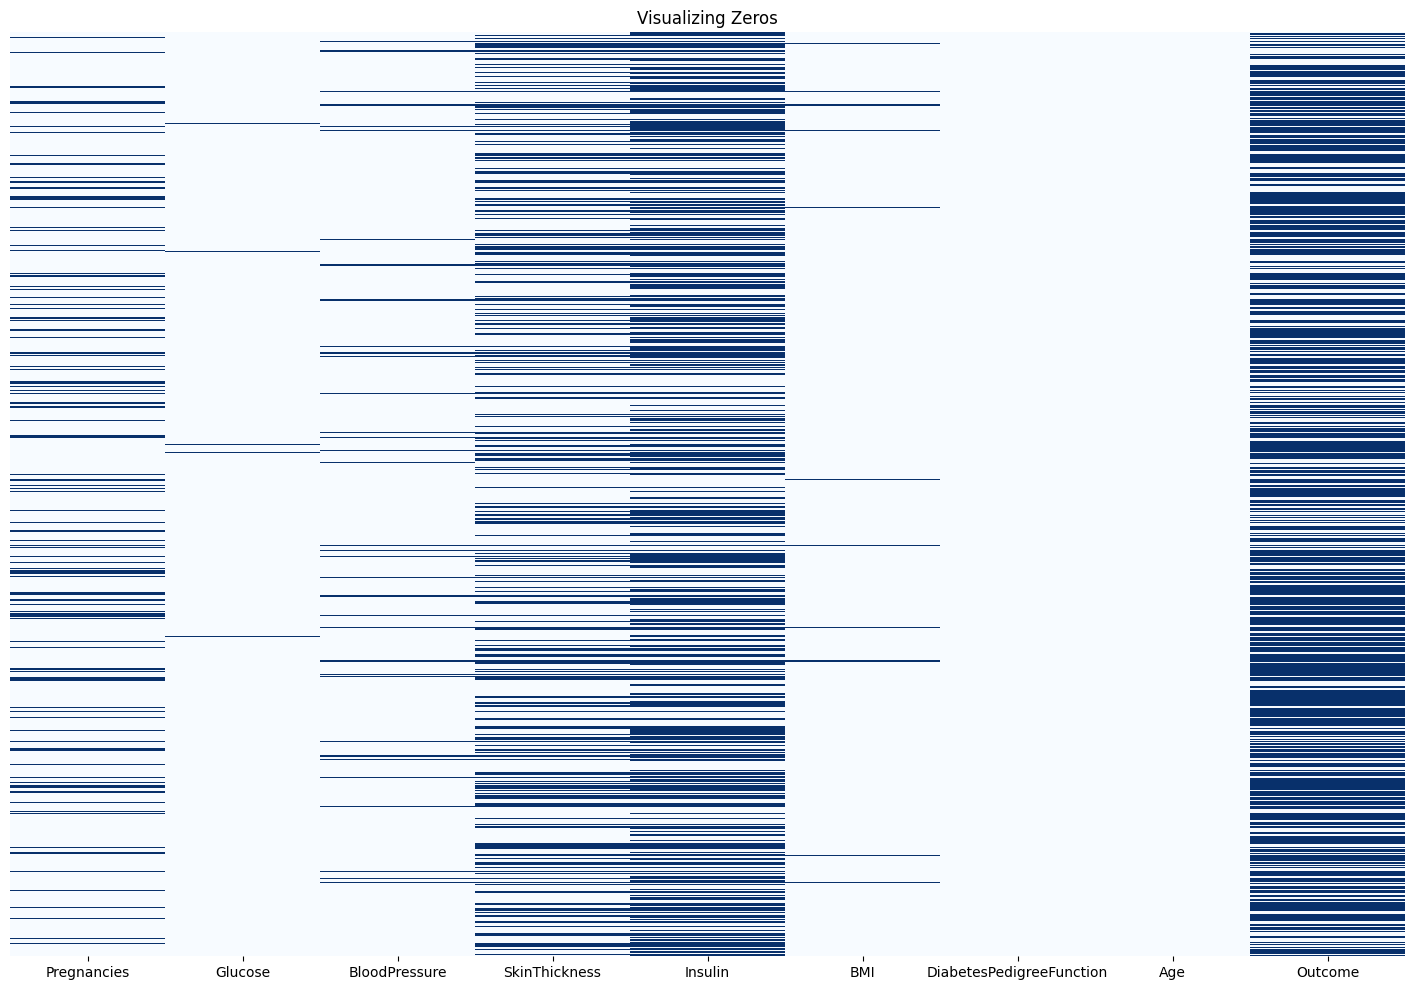

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualización de zeros
plt.figure(figsize=(18,12))
plt.title("Visualizing Zeros")
sns.heatmap(df==0, cbar=False, cmap='Blues', yticklabels=False);

- Si una persona tiene cero insulina, es diabética, ya que sus células no pueden transportar la glucosa desde el torrente sanguíneo hacia el interior de las células. Sin embargo, en nuestro conjunto de datos, no todos los ceros en la columna Insulin corresponden a un Outcome de 1 (indicando diabetes). Esto sugiere que muchos ceros en la columna Insulin son en realidad valores incorrectos.
- Glucosa tiene algunos zeros random.
- Además, parece que hay muchas filas que tienen ceros en las tres columnas: Blood Pressure, Skin Thickness e Insulin. Esto podría indicar que al momento de capturar los datos o de tomar las medidas, se omitió esa información, lo que dificulta el análisis. 

In [302]:
# Filtramos el DataFrame 'diabetes' para eliminar filas que contengan valores 0 en las columnas 'Glucose', 'BloodPressure' y 'BMI'.
# Usamos .loc[] para seleccionar solo las filas que cumplen con la condición.
# axis=1 indica que la evaluación se debe hacer por fila.
# All se utiliza para verificar si todas las condiciones en la fila son verdaderas, podría usarse any que sería para indicar que al menos una condición es verdadera

diabetes_cleaned = df.loc[
    (df[['Glucose', 'BloodPressure', 'BMI']] != 0).all(axis=1)
]
diabetes_cleaned.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1


In [303]:
# Ejemplo usando axis 0
(df[['Glucose', 'BloodPressure', 'BMI']] != 0).all(axis=0)

Glucose          False
BloodPressure    False
BMI              False
dtype: bool

In [304]:
# ejemplo sin evaluar la fila completa
(df[['Glucose', 'BloodPressure', 'BMI']] != 1)

,Glucose,BloodPressure,BMI
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
763,True,True,True
764,True,True,True
765,True,True,True
766,True,True,True


In [305]:
# axis=1 indica que la evaluación se debe hacer por fila. Y el all, para evaluar que todas las condiciones se cumplanm
(df[['Glucose', 'BloodPressure', 'BMI']] != 0).all(axis=1)

0      True
1      True
2      True
3      True
4      True
       ... 
763    True
764    True
765    True
766    True
767    True
Length: 768, dtype: bool

### Reemplazar los zeros en Skin Thickness por el promedio de la columna

In [306]:
# Visualizar el promedio
promedio_skinthickness = diabetes_cleaned['SkinThickness'].mean()
promedio_skinthickness

np.float64(21.443370165745858)

In [307]:
# Visualizar los indices de SkinThickness que tienen valor 0
diabetes_cleaned.loc[diabetes_cleaned['SkinThickness'] == 0, 'SkinThickness'].head(20)

2     0
5     0
10    0
11    0
12    0
17    0
21    0
22    0
26    0
29    0
33    0
36    0
41    0
44    0
46    0
58    0
61    0
62    0
64    0
67    0
Name: SkinThickness, dtype: int64

In [308]:
# reemplazar los indices de SkinThickness que tienen valor 0 por el promedio de la columna
diabetes_cleaned.loc[diabetes_cleaned['SkinThickness'] == 0, 'SkinThickness'] = promedio_skinthickness

C:\Users\Dell\AppData\Local\Temp\ipykernel_2620\1006260612.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '21.443370165745858' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  diabetes_cleaned.loc[diabetes_cleaned['SkinThickness'] == 0, 'SkinThickness'] = promedio_skinthickness


In [309]:
# Visualizar los indices de SkinThickness que tienen valor 0
diabetes_cleaned.loc[diabetes_cleaned['SkinThickness'] == 0, 'SkinThickness'].head(20)

Series([], Name: SkinThickness, dtype: float64)

## 📊 Bloque 2: Estadística Descriptiva
En este bloque, exploraremos estadísticas básicas usando `numpy` y `pandas`.

**Conceptos clave:**
- Cálculo de media, mediana y moda.
- Identificación de valores atípicos con desviación estándar.
- Cálculo de correlaciones entre variables.

In [310]:
import numpy as np

# Calcular la media y mediana de la glucosa
media_glucosa = np.mean(df['Glucose'])
mediana_glucosa = np.median(df['Glucose'])

print(f"Media de Glucosa: {media_glucosa}")
print(f"Mediana de Glucosa: {mediana_glucosa}")

Media de Glucosa: 120.89453125
Mediana de Glucosa: 117.0


In [311]:
# Calcular la desviación estándar de la glucosa
std_glucosa = np.std(df['Glucose'])
print(f"Desviación Estándar de Glucosa: {std_glucosa}")

Desviación Estándar de Glucosa: 31.95179590820272


## 🔗 Recursos adicionales
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [NumPy Documentation](https://numpy.org/doc/)
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)

## 📊 Bloque 3: Gráficos de Barras
Los gráficos de barras permiten comparar valores entre distintas categorías.

**Principios básicos:**
- Utilizar etiquetas claras en los ejes.
- Definir colores que permitan diferenciar categorías.
- Incluir un título descriptivo.

In [312]:
import matplotlib.pyplot as plt

# Contar el número de casos de diabetes y no diabetes
conteo_outcome = df['Outcome'].value_counts()
conteo_outcome

Outcome
0    500
1    268
Name: count, dtype: int64

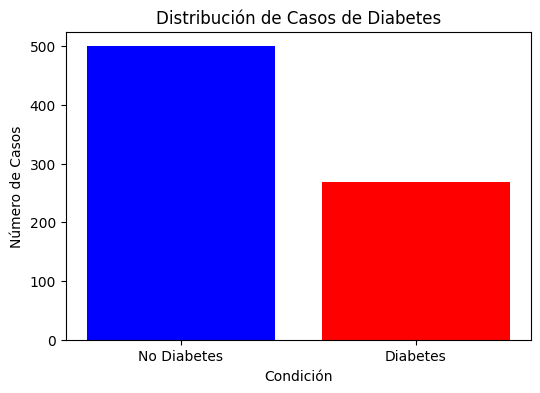

In [313]:
# Crear el gráfico de barras
plt.figure(figsize=(6,4))
plt.bar(['No Diabetes', 'Diabetes'], conteo_outcome, color=['blue', 'red'])
plt.xlabel('Condición')
plt.ylabel('Número de Casos')
plt.title('Distribución de Casos de Diabetes')
plt.show()

# Ejemplo contar el número total de personas con diferente cantidad de embarazos

In [314]:
# Contar la cantidad de registros por número de embarazos
conteo_embarazos = df['Pregnancies'].value_counts()
pd.DataFrame(conteo_embarazos)

,count
Pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


In [315]:
# Número de embarazos
conteo_embarazos.index

Index([1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 12, 14, 17, 15], dtype='int64', name='Pregnancies')

In [316]:
# Cantidad de personas con ese número de embarazos
conteo_embarazos.values

array([135, 111, 103,  75,  68,  57,  50,  45,  38,  28,  24,  11,  10,
         9,   2,   1,   1])

### ✏️ Actividad: Crear un Gráfico de Barras
Crea un gráfico de barras que muestre la cantidad de personas por número de embarazos (`Pregnancies`).
- El tamaño de la figura debe ser 8 x 5
- El plot debe ser de tipo bara e incluir los números de Embarazos en la x y la cantidad de personas en la Y
- Debe tener etiqueta en x
- Debe tener etiqueta en y
- Debe tener el titulo 'Distribución de Embarazos en el Dataset'
- Debes incluir una sentencia que lo muestre
- Debes hacer que el gráfico tenga color purpura

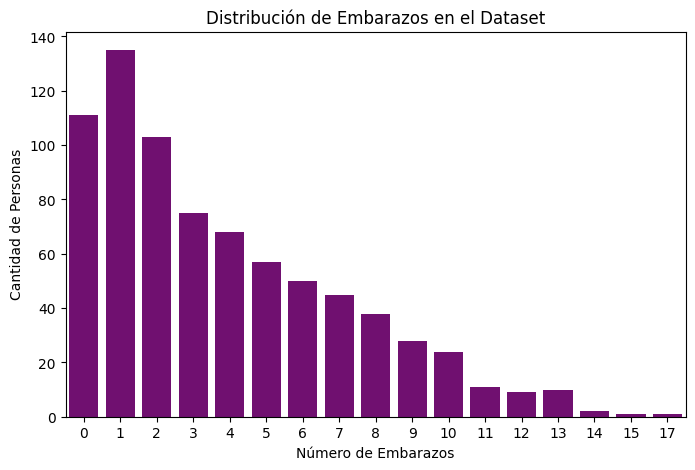

In [317]:
ejex=conteo_embarazos.index
plt.figure(figsize=(8, 5))
sns.barplot(x=ejex,y=conteo_embarazos, color='purple')
plt.xlabel("Número de Embarazos")
plt.ylabel("Cantidad de Personas")
plt.title("Distribución de Embarazos en el Dataset")
plt.show()

## 📊 Bloque 4: Gráficos de Columnas
Los gráficos de columnas son similares a los de barras, pero con orientación vertical.

**Principios básicos:**
- Mantener la alineación correcta de las etiquetas.
- No sobrecargar con demasiadas columnas.
- Usar colores que resalten las diferencias.

### Ejemplo agrupar y sacar promedios

In [318]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Obtener el promedio solo del BMI (Indice de masa corporal)

In [319]:
df.groupby('Outcome')['BMI'].mean()

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64

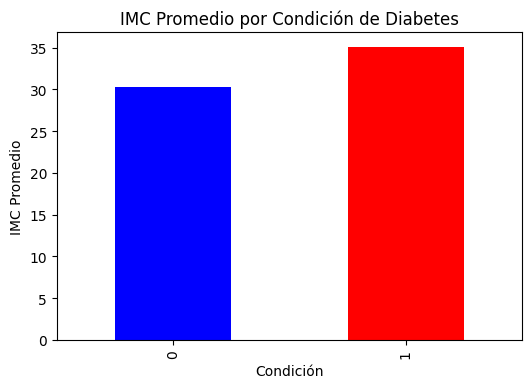

In [320]:
# Crear un gráfico de columnas para visualizar el IMC promedio por condición de diabetes
df.groupby('Outcome')['BMI'].mean().plot(kind='bar', color=['blue', 'red'], figsize=(6,4))
plt.xlabel('Condición')
plt.ylabel('IMC Promedio')
plt.title('IMC Promedio por Condición de Diabetes')
plt.show()

## 🔎 Interpretación del IMC según la OMS
$$
IMC = \frac{\text{Peso (kg)}}{\text{Altura (m)}^2}
$$

| IMC (kg/m²)  | Clasificación |
|--------------|--------------|
| < 18.5       | Bajo peso    |
| 18.5 - 24.9  | Peso normal  |
| 25 - 29.9    | Sobrepeso    |
| 30 - 34.9    | Obesidad I   |
| 35 - 39.9    | Obesidad II  |
| ≥ 40         | Obesidad III |

---


## 📊 Bloque 5: Gráficos de Dispersión
Los gráficos de dispersión permiten analizar la relación entre dos variables numéricas.

**Principios básicos:**
- Representar cada punto de manera clara.
- Usar colores para diferenciar categorías.
- Interpretar patrones en la distribución.

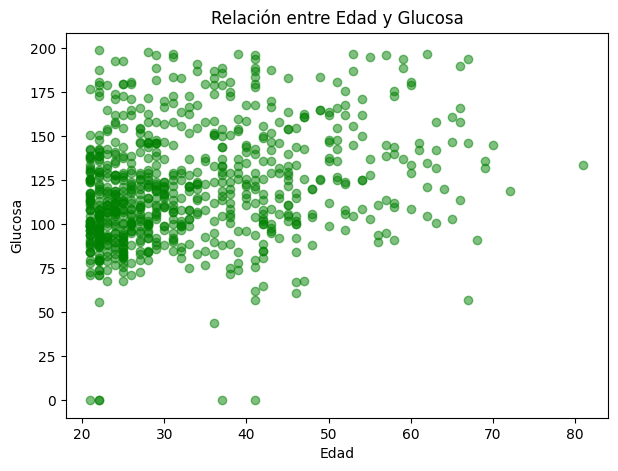

In [321]:
# Crear un gráfico de dispersión entre Glucosa y Edad
plt.figure(figsize=(7,5))
plt.scatter(df['Age'], df['Glucose'], alpha=0.5, color='green')
plt.xlabel('Edad')
plt.ylabel('Glucosa')
plt.title('Relación entre Edad y Glucosa')
plt.show()

# 📊 Análisis del Gráfico de Dispersión: Relación entre Edad y Glucosa

Este gráfico representa la relación entre la **edad** y los niveles de **glucosa** en la población analizada.

---

## 🔹 ¿Qué es un gráfico de dispersión?
Un **gráfico de dispersión** se utiliza para visualizar la relación entre dos variables numéricas. Cada punto representa una observación individual en el dataset.

**Principios clave:**
- **Patrón ascendente** → Indica una correlación positiva.
- **Patrón descendente** → Indica una correlación negativa.
- **Distribución dispersa sin forma clara** → Indica una correlación baja o inexistente.

---

## 🔍 **Análisis del gráfico**
### 1️⃣ **Distribución de los datos**
- La mayoría de los puntos se concentran en edades **entre 20 y 50 años** con valores de glucosa **entre 75 y 125 mg/dL**.
- A medida que la edad avanza, los valores de glucosa parecen dispersarse más.

### 2️⃣ **¿Existe una correlación clara?**
- Este gráfico **no muestra una tendencia lineal clara**. Por lo que un gráfico de lineas sería más útil.
- Esto sugiere que la relación entre edad y glucosa **no es fuerte ni directa**.
- Sin embargo, se observa que algunos valores extremos de glucosa se presentan con mayor frecuencia en edades avanzadas (Ejemplo 40).

### 3️⃣ **Posibles interpretaciones**
- **Personas más jóvenes (20-40 años)** tienden a tener glucosa más estable.
- **Personas mayores (>50 años)** presentan una mayor variabilidad en los niveles de glucosa.
- Esto puede deberse a **factores de salud individuales**, como la presencia de diabetes o hábitos de vida.

---

## 📊 Bloque 6: Gráficos de Líneas
Los gráficos de líneas se usan para representar tendencias en datos continuos.

**Principios básicos:**
- Útil para visualizar cambios en el tiempo.
- Suavizar líneas cuando sea necesario.
- Evitar el uso en variables categóricas.

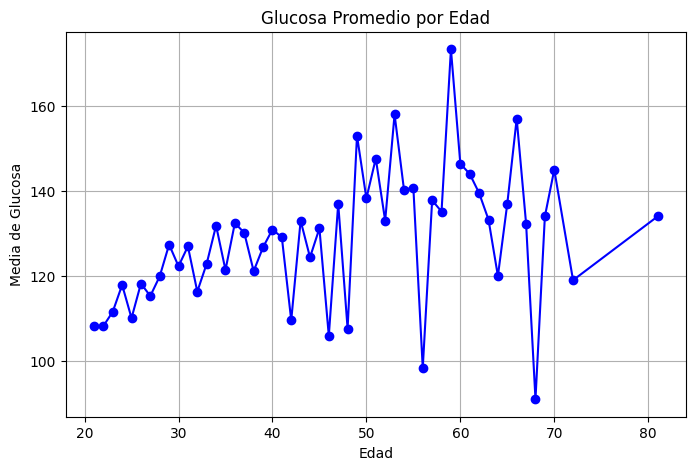

In [322]:
# Ordenar datos por edad y graficar la media de glucosa
df_sorted = df.groupby('Age')['Glucose'].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(8,5))
plt.plot(df_sorted.index, df_sorted.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Edad')
plt.ylabel('Media de Glucosa')
plt.title('Glucosa Promedio por Edad')
plt.grid()
plt.show()

# 📈 Interpretación del Gráfico: Glucosa Promedio por Edad

Este gráfico de líneas muestra la **relación entre la edad y la media de glucosa** en la población analizada.

---

## 🔎 **Observaciones Clave**
### 1️⃣ **Tendencia General (Crecimiento Inicial)**
- A medida que la edad aumenta de **20 a 50 años**, la **media de glucosa tiende a aumentar**.
- Esto sugiere que los niveles de glucosa son **relativamente más bajos en personas jóvenes** y aumentan con la edad.

### 2️⃣ **Mayor Variabilidad después de los 50 años**
- Después de los **50 años**, la glucosa promedio presenta **altibajos más pronunciados**, lo que indica una **mayor variabilidad** en los niveles de glucosa en esta población.
- Esto podría deberse a que **algunas personas mayores tienen diabetes**, mientras que otras mantienen niveles más normales.

### 3️⃣ **Picos y Caídas Extremos**
- Se observan picos altos alrededor de los **50-60 años**, donde la glucosa promedio supera los **160 mg/dL**, indicando que algunos grupos dentro de esa edad podrían tener un mayor riesgo de diabetes.
- También hay **caídas bruscas**, lo que podría deberse a **muestras más pequeñas en ciertos grupos de edad**, causando fluctuaciones más drásticas.

### 4️⃣ **Disminución y Fluctuaciones en la Vejez**
- Entre los **60 y 80 años**, la glucosa sigue siendo variable, pero con valores más dispersos.
- Esto podría reflejar que algunas personas con diabetes ya están en tratamiento, mientras que otras tienen niveles descontrolados.

---


# ✏️ Actividad: Análisis del Gráfico de Glucosa Promedio por Edad

## 📌 Objetivo:
Analizar el comportamiento de la glucosa en distintas edades y responder preguntas clave para interpretar los datos.

---

## 🔍 **Instrucciones**
1. Observa detenidamente el gráfico **"Glucosa Promedio por Edad"**.
2. Reflexiona sobre las variaciones en los valores y la relación entre la edad y la glucosa.
3. **Responde las siguientes preguntas en la celda de Markdown debajo del código.**

---

## 📊 **Preguntas de Análisis** 📝 **Responde aquí**
(Escribe tus respuestas en esta celda de Markdown)

1️⃣ ¿Por qué crees que la glucosa aumenta con la edad? ¿Qué factores biológicos o de estilo de vida podrían influir?
-Debido a una menor sensibilidad a la insulina, el deterioro del páncreas y cambios hormonales. Además, factores como la reducción de la actividad física, el aumento de la grasa corporal y una dieta menos saludable contribuyen a este aumento

2️⃣ ¿Por qué la variabilidad en los niveles de glucosa es mayor después de los 50 años? ¿Qué puede estar afectando estos cambios?  
-Debido a que en estas edades hay una diversidad de niveles de glucosa, tanto hay muchas personas con altos niveles como también niveles bajos, dando valores muy variados.

3️⃣ ¿Cómo interpretarías los picos más altos en los valores de glucosa? ¿A qué grupo de personas podría representar?  
-Interpreto a que son personas con diabetes, perteneciendo a este grupo y también personas de 50 y mayores, ya que son más propensos.

4️⃣ ¿Cuáles son las posibles causas de las caídas bruscas en la glucosa a edades avanzadas?  
-Ya que puede ser que sean personas con diabetes y que ya están en tratamientos.

5️⃣ ¿Qué recomendaciones harías para la prevención de la diabetes basándote en este análisis? 
-Que conforme avance la edad se prevenga midiendo la glucosa ya que pueden ser más propensos y prevenirlo cuidando lo que consumen y tratarse con expertos. 

---

# 🔥 Bloque 7: Mapa de Calor con Seaborn
Los mapas de calor permiten visualizar matrices de correlación o valores numéricos en una escala de colores.

**Principios básicos:**
- Usar una escala de colores adecuada.
- Incluir etiquetas para facilitar la interpretación.
- Evitar el uso excesivo en datasets muy grandes.

In [323]:
# Cargar el dataset de nuevo para evitar errores
df = pd.read_csv("diabetes2.csv")

In [324]:
# %pip install seaborn

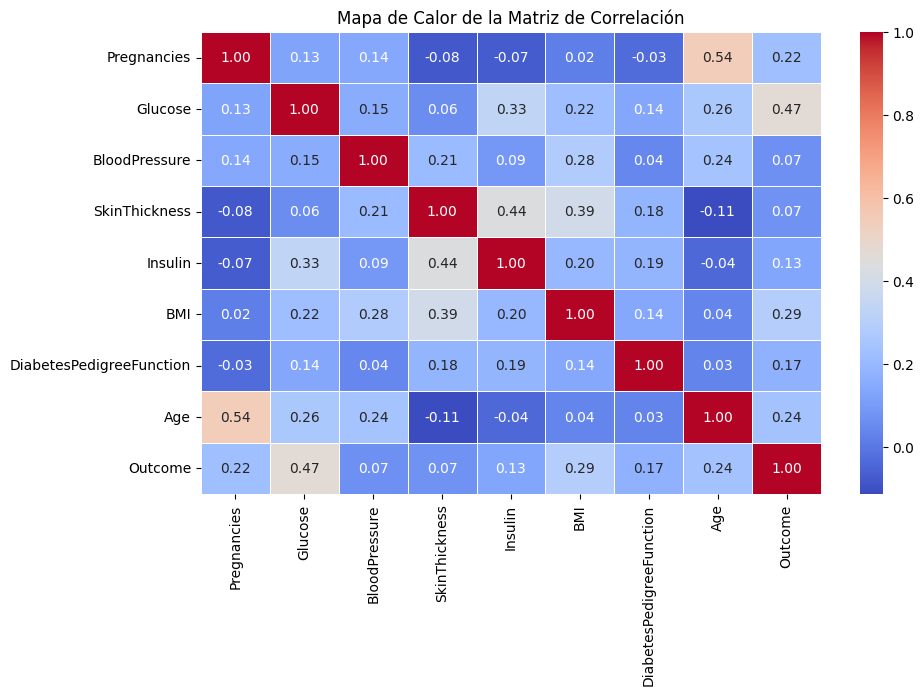

In [325]:
import seaborn as sns
# Calcular la matriz de correlación
correlacion = df.corr()

# Crear el mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

# 📊 Interpretación del Mapa de Calor de Correlaciones

El mapa de calor representa la **matriz de correlación** entre las variables del dataset. 

## 🔹 ¿Cómo interpretar los valores?
- **Valores cercanos a 1 (rojo oscuro)** → **Correlación positiva fuerte**  
  - Cuando una variable aumenta, la otra también lo hace.
- **Valores cercanos a -1 (azul oscuro)** → **Correlación negativa fuerte**  
  - Cuando una variable aumenta, la otra disminuye.
- **Valores cercanos a 0 (azul claro)** → **Correlación débil o inexistente**  
  - No hay una relación clara entre las variables.

---

## 🔎 **Observaciones clave:**

### 1️⃣ **Glucosa vs. Outcome (0.47)**
- Existe una **correlación moderada positiva** entre los niveles de **glucosa** y la **presencia de diabetes**.
- **Conclusión:** A medida que **aumenta la glucosa**, también **aumenta la probabilidad de ser diagnosticado con diabetes**.

### 2️⃣ **Edad vs. Outcome (0.24)**
- Hay una **correlación positiva débil**, lo que sugiere que la diabetes es **más frecuente en personas mayores**, aunque la relación no es muy fuerte.

### 3️⃣ **BMI (Índice de Masa Corporal) vs. Outcome (0.29)**
- Existe una **correlación positiva moderada**, lo que implica que **a mayor índice de masa corporal (BMI), mayor es la probabilidad de tener diabetes**.

### 4️⃣ **Edad vs. Número de Embarazos (0.54)**
- Hay una **correlación positiva fuerte** entre la **edad** y el **número de embarazos**.
- **Explicación:** Esto es esperable, ya que las mujeres mayores han tenido **más tiempo** para embarazarse.

### 5️⃣ **Glucosa vs. Insulina (0.33)**
- Existe una **correlación moderada** entre la **glucosa** y la **insulina**, lo que puede estar relacionado con la respuesta del cuerpo a los niveles de azúcar en sangre.

### 6️⃣ **Relaciones Débiles (valores cercanos a 0)**
- Variables como **SkinThickness (Grosor de la Piel)** tienen **una correlación muy baja con la diabetes (0.07)**.
- Otras correlaciones bajas incluyen **BloodPressure (0.07)** e **Insulin (0.13)**, lo que indica que **no son buenos predictores de la enfermedad**.

---

Las demás variables podrían contribuir, pero con menor impacto en el diagnóstico.  

---

💡 **¿Qué sigue?**  
Si queremos predecir la diabetes, podemos probar modelos de Machine Learning priorizando las variables más importantes y descartando aquellas con correlaciones débiles. 🚀


# ✏️ Actividad: Análisis del Mapa de Calor

## 📌 Objetivo:
Analizar la matriz de correlación y responder preguntas clave sobre las variables más relevantes en la predicción de la diabetes.

---

## 🔍 **Instrucciones**
1. Ejecuta el código que genera el **Mapa de Calor** en el dataset `diabetes2.csv`.
2. Observa los valores de correlación entre las variables.
3. **Responde las siguientes preguntas en la celda de Markdown debajo del código.**

---

## 📊 **Preguntas de Análisis** 📝 **Responde aquí**
(Escribe tus respuestas en esta celda de Markdown)

1️⃣ ¿Cuál es la variable que tiene la correlación más alta con la **diabetes (`Outcome`)**? ¿Qué significa esto en términos prácticos?
-La glucosa, que entre más alta la glucosa es más propenso a tener diabetes.  

2️⃣ ¿Cómo afecta la edad a la diabetes según la matriz de correlación? ¿Crees que es un factor importante en la predicción de la enfermedad?  
-No afecta mucho, ya que se ve que solo en personas mayores, pero no es algo importante a considerar.

3️⃣ ¿Qué puedes concluir sobre la relación entre **BMI (Índice de Masa Corporal)** y la diabetes? 
-No es una relación muy fuerte pero es moderada, ya que entre más aumente el BMI más es propenso al diabetes. 

4️⃣ ¿Hay alguna variable en la matriz que **NO parezca ser un buen predictor** de la diabetes? Justifica tu respuesta. 
-BlooPressure y SkinThickness, ya que son valores muy cercanos a cero mostrando que la correlación con la variable de diabetes no es tan fuerte y no afecta demasiado. 

5️⃣ Si estuvieras diseñando un modelo de Machine Learning para predecir la diabetes, ¿qué **tres variables seleccionarías** como las más importantes? Explica tu elección.  
-Primeramente la glucosa, después el BMI y por último la edad, ya que son las variables con una correlación positiva alta, mostrandonos que son las más importantes.

---

## 📊 Bloque 9: Visualización de Histogramas
Los histogramas permiten visualizar la **distribución de los datos** y entender la variabilidad de cada variable en el dataset.

**Principios clave:**
- Utilizar un número adecuado de **bins** (intervalos) para representar los datos sin perder información.
- Incluir una **línea de densidad (`kde=True`)** para facilitar la interpretación.
- Excluir variables categóricas (`Outcome` e `InsulinKnown`) para que los histogramas sean adecuados.
- Usar un **gráfico de conteo (`countplot`)** para visualizar variables categóricas como `InsulinKnown`.

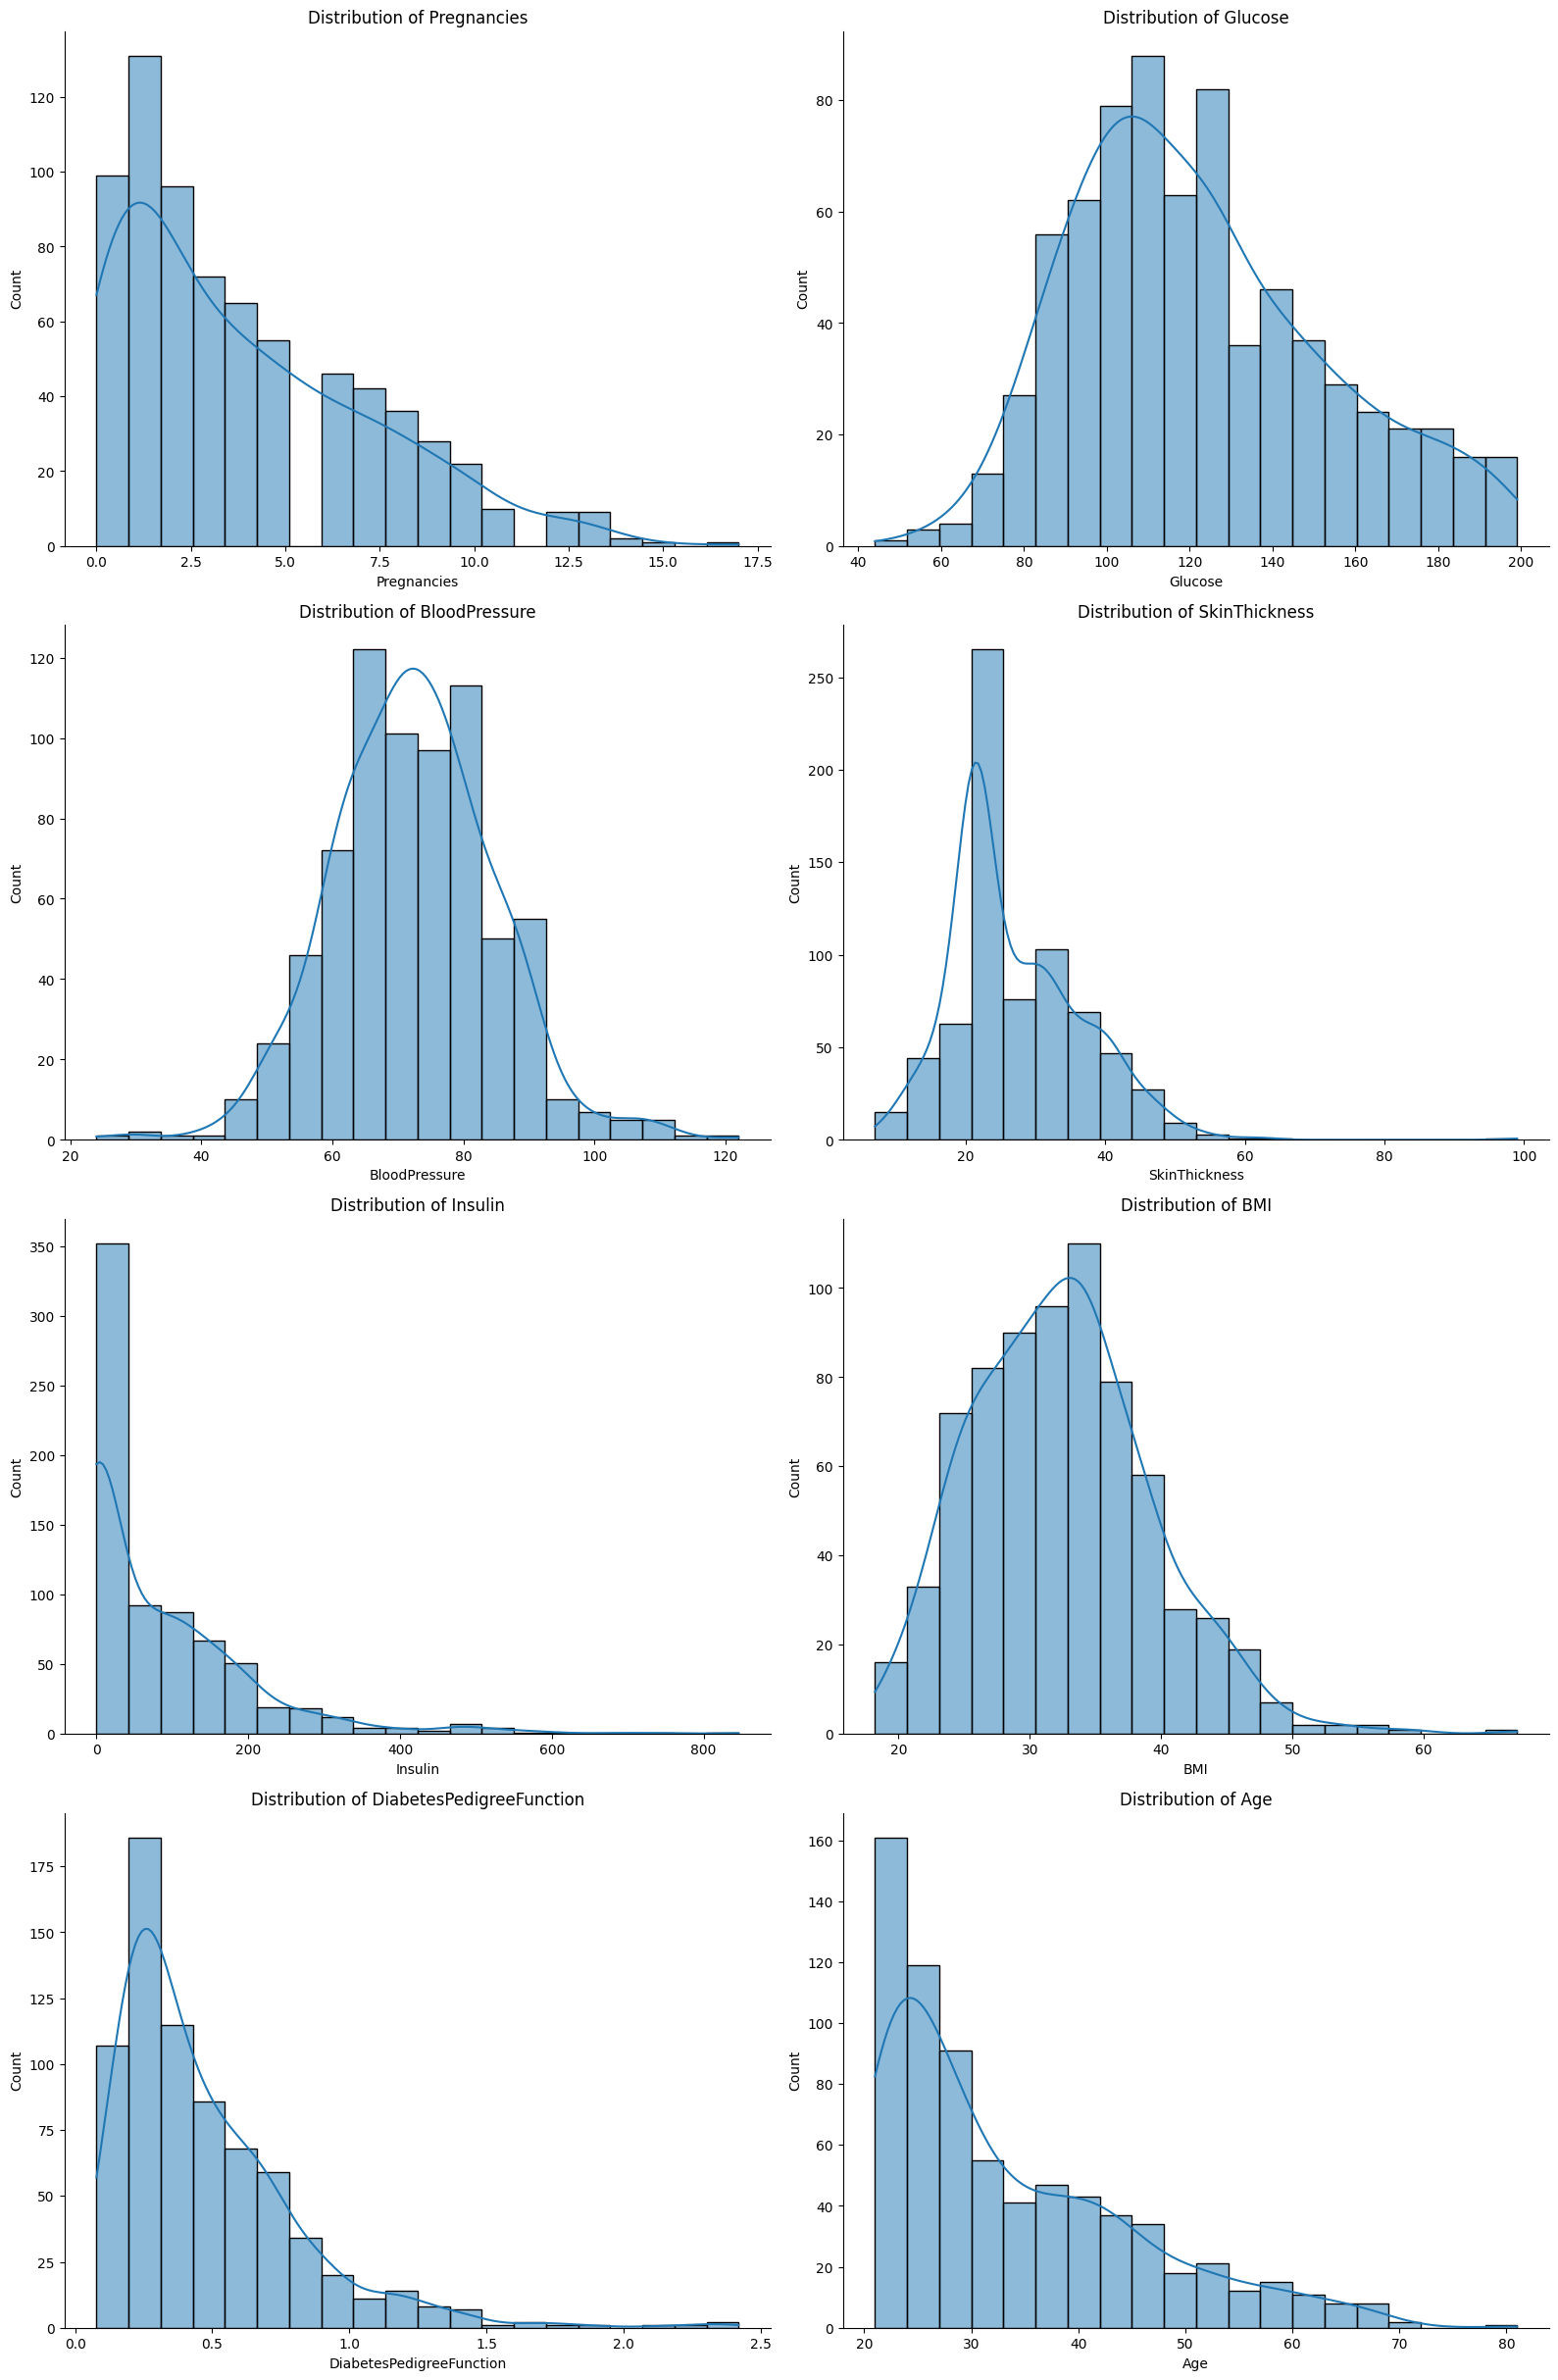

In [326]:
# Filtrar las columnas que no deben incluirse en los histogramas
columns_to_plot = [col for col in diabetes_cleaned.columns if col not in ['Outcome', 'InsulinKnown']]

# Número de columnas para la visualización de histogramas
num_cols = 2

# Calcular el número de filas necesarias
num_rows = (len(columns_to_plot) + num_cols) // num_cols

plt.figure(figsize=(16, num_rows * 6))  # Ajustar el tamaño para acomodar los gráficos

# Generar histogramas para cada columna
for i, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=diabetes_cleaned, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    sns.despine()


plt.tight_layout()  # Ajustar el diseño de los subgráficos
plt.show()

# 📊 Interpretación de los Histogramas de Variables del Dataset

Los histogramas muestran la **distribución de los datos** en las variables del dataset, permitiendo identificar su comportamiento y patrones clave.

---

## 🔍 **Análisis de las Variables**
### 1️⃣ **Pregnancies (Número de Embarazos)**
- Distribución **sesgada a la derecha** (asimétrica positiva).
- La mayoría de las mujeres han tenido pocos embarazos (0-2), pero hay algunas con más de 10.
- Este sesgo es esperado, ya que los embarazos múltiples son menos comunes.

#### 📊 ¿Por qué la distribución de "Pregnancies" está sesgada a la derecha?

Cuando hablamos de **sesgo en una distribución**, nos referimos a **la dirección de la cola de la distribución**, **no** a dónde vemos más datos en el gráfico.

---

#### 🔍 **Regla para interpretar el sesgo de una distribución**
- **Sesgo a la derecha (positivo):**  
  - La **cola de la distribución** se extiende hacia valores **altos** (derecha del eje X).  
  - La mayoría de los datos están concentrados en valores bajos, pero algunos valores más grandes (outliers) crean una cola larga hacia la derecha.  
  - **Ejemplo:** Ingresos de una población (pocos ricos con salarios muy altos crean la cola a la derecha).

- **Sesgo a la izquierda (negativo):**  
  - La **cola de la distribución** se extiende hacia valores **bajos** (izquierda del eje X).  
  - La mayoría de los datos están en valores altos, pero algunos valores pequeños crean una cola larga hacia la izquierda.  
  - **Ejemplo:** Edad de jubilación (casi todos se jubilan alrededor de 60-65 años, pero hay algunos casos tempranos creando la cola izquierda).

- **Distribución Normal (Sin Sesgo)**
  - También llamada **distribución gaussiana** o **campana de Gauss**.
  - La **media, mediana y moda** están alineadas en el centro.
  - La gráfica es **simétrica**, es decir, la cantidad de datos a la izquierda y derecha de la media es similar.
  - **Ejemplo:** Altura de las personas en una población.

---

### 2️⃣ **Glucose (Glucosa)**
- Distribución **similar a una normal** pero con ligera asimetría hacia la derecha.
- Hay más casos en el rango de **90-130 mg/dL**, pero algunos valores extremos superan los **180 mg/dL**, lo que puede indicar posibles casos de diabetes.
- La presencia de valores altos sugiere que algunas personas tienen **hiperglucemia**.

### 3️⃣ **BloodPressure (Presión Arterial)**
- Distribución aproximadamente **normal**.
- Se observa un rango central entre **60-90 mmHg**, lo cual es esperable en la población general.
- Pocos valores extremos, lo que indica que la mayoría de los pacientes tienen presión arterial dentro del rango típico.

### 4️⃣ **SkinThickness (Grosor del Pliegue Cutáneo)**
- Distribución **sesgada a la derecha**.
- La mayoría de los valores están por debajo de **40 mm**, pero hay algunos valores atípicos mayores a **60 mm**.
- Puede haber valores faltantes o errores en el dataset.

### 5️⃣ **Insulin (Insulina en Sangre)**
- Distribución **muy sesgada a la derecha** con una gran cantidad de valores en 0.
- Indica que muchas personas tienen niveles bajos de insulina o que existen datos faltantes en la columna.
- Este sesgo sugiere que se debería tratar la variable antes de su uso en modelos de Machine Learning.

### 6️⃣ **BMI (Índice de Masa Corporal)**
- Distribución **aproximadamente normal**, pero con ligera asimetría hacia la derecha.
- Valores entre **20 y 40** son los más comunes.
- Algunos valores altos (>50) podrían ser outliers.

### 7️⃣ **DiabetesPedigreeFunction (Historial Familiar de Diabetes)**
- Distribución **sesgada a la derecha**.
- La mayoría de las personas tienen un puntaje de **riesgo genético** bajo (0.0 - 0.5), pero algunos presentan valores altos (>1.5), lo que sugiere mayor predisposición a la diabetes.

### 8️⃣ **Age (Edad)**
- Distribución **sesgada a la derecha**.
- Mayor concentración de pacientes entre **20 y 40 años**, con menor cantidad de pacientes mayores de 60.
- Esto podría indicar que el dataset tiene más personas jóvenes y de mediana edad, y menos adultos mayores.

---

# ✏️ Actividad: Análisis de Histogramas y Distribución de Datos

## 📌 Objetivo:
Analizar la distribución de las variables en el dataset y reflexionar sobre su impacto en el análisis de datos.

---

## 🔍 **Instrucciones**
1. Observa detenidamente los histogramas de cada variable.
2. Analiza su forma y distribuciones (asimétricas, normales, con valores atípicos, etc.).
3. **Responde las siguientes preguntas en esta celda de Markdown**

---

## 📊 **Preguntas de Análisis**
1️⃣ ¿Qué variables muestran una distribución aproximadamente normal?
- Las variables de BloodPressure y la de Glucosa

2️⃣ ¿Cuáles tienen una distribución sesgada a la derecha? ¿Qué significa esto en términos de datos?  
- Pregnancies, SkinThickness, Insuline, DiabetesPedigreeFunction y Age. Esto significa que la concentración de números altos esta en los primeros valores y que va disminuyendo conforme la variable aumenta.

3️⃣ ¿Cómo interpretarías la gran cantidad de valores en 0 en la variable `Insulin`? 
- Que hay una gran cantidad de personas que no estan consumiendo la insulina.
 
4️⃣ ¿Cuál es la variable con mayor dispersión en los datos? ¿Cómo podríamos manejar esta variabilidad en un análisis predictivo?
- Glucosa, ya que se ve como hay picos altos luego bajos y así conforme aumenta la variable, podriamos sacar promedios para poder evaluarla mejor.

5️⃣ ¿Qué conclusiones puedes obtener sobre la relación entre la edad y la prevalencia de diabetes, basándote en el histograma de `Age`?
- Primeramente que son muy similares, por lo que conforme aumenta la edad también tienen más probabilidad a ser propensos a diabetes.  

---


## 🎁 BONUS: Visualización de Outliers con Boxplots
Los **boxplots** (diagramas de caja) son una herramienta útil para visualizar la distribución de los datos y detectar **outliers** (valores atípicos).

**Principios clave:**
- El **cuadro central** representa el **rango intercuartil (IQR)**, donde se encuentra el 50% de los datos.
- La **línea dentro del cuadro** representa la **mediana**.
- Los **bigotes** indican la dispersión normal de los datos.
- Los **puntos fuera de los bigotes** son **outliers** (valores atípicos).

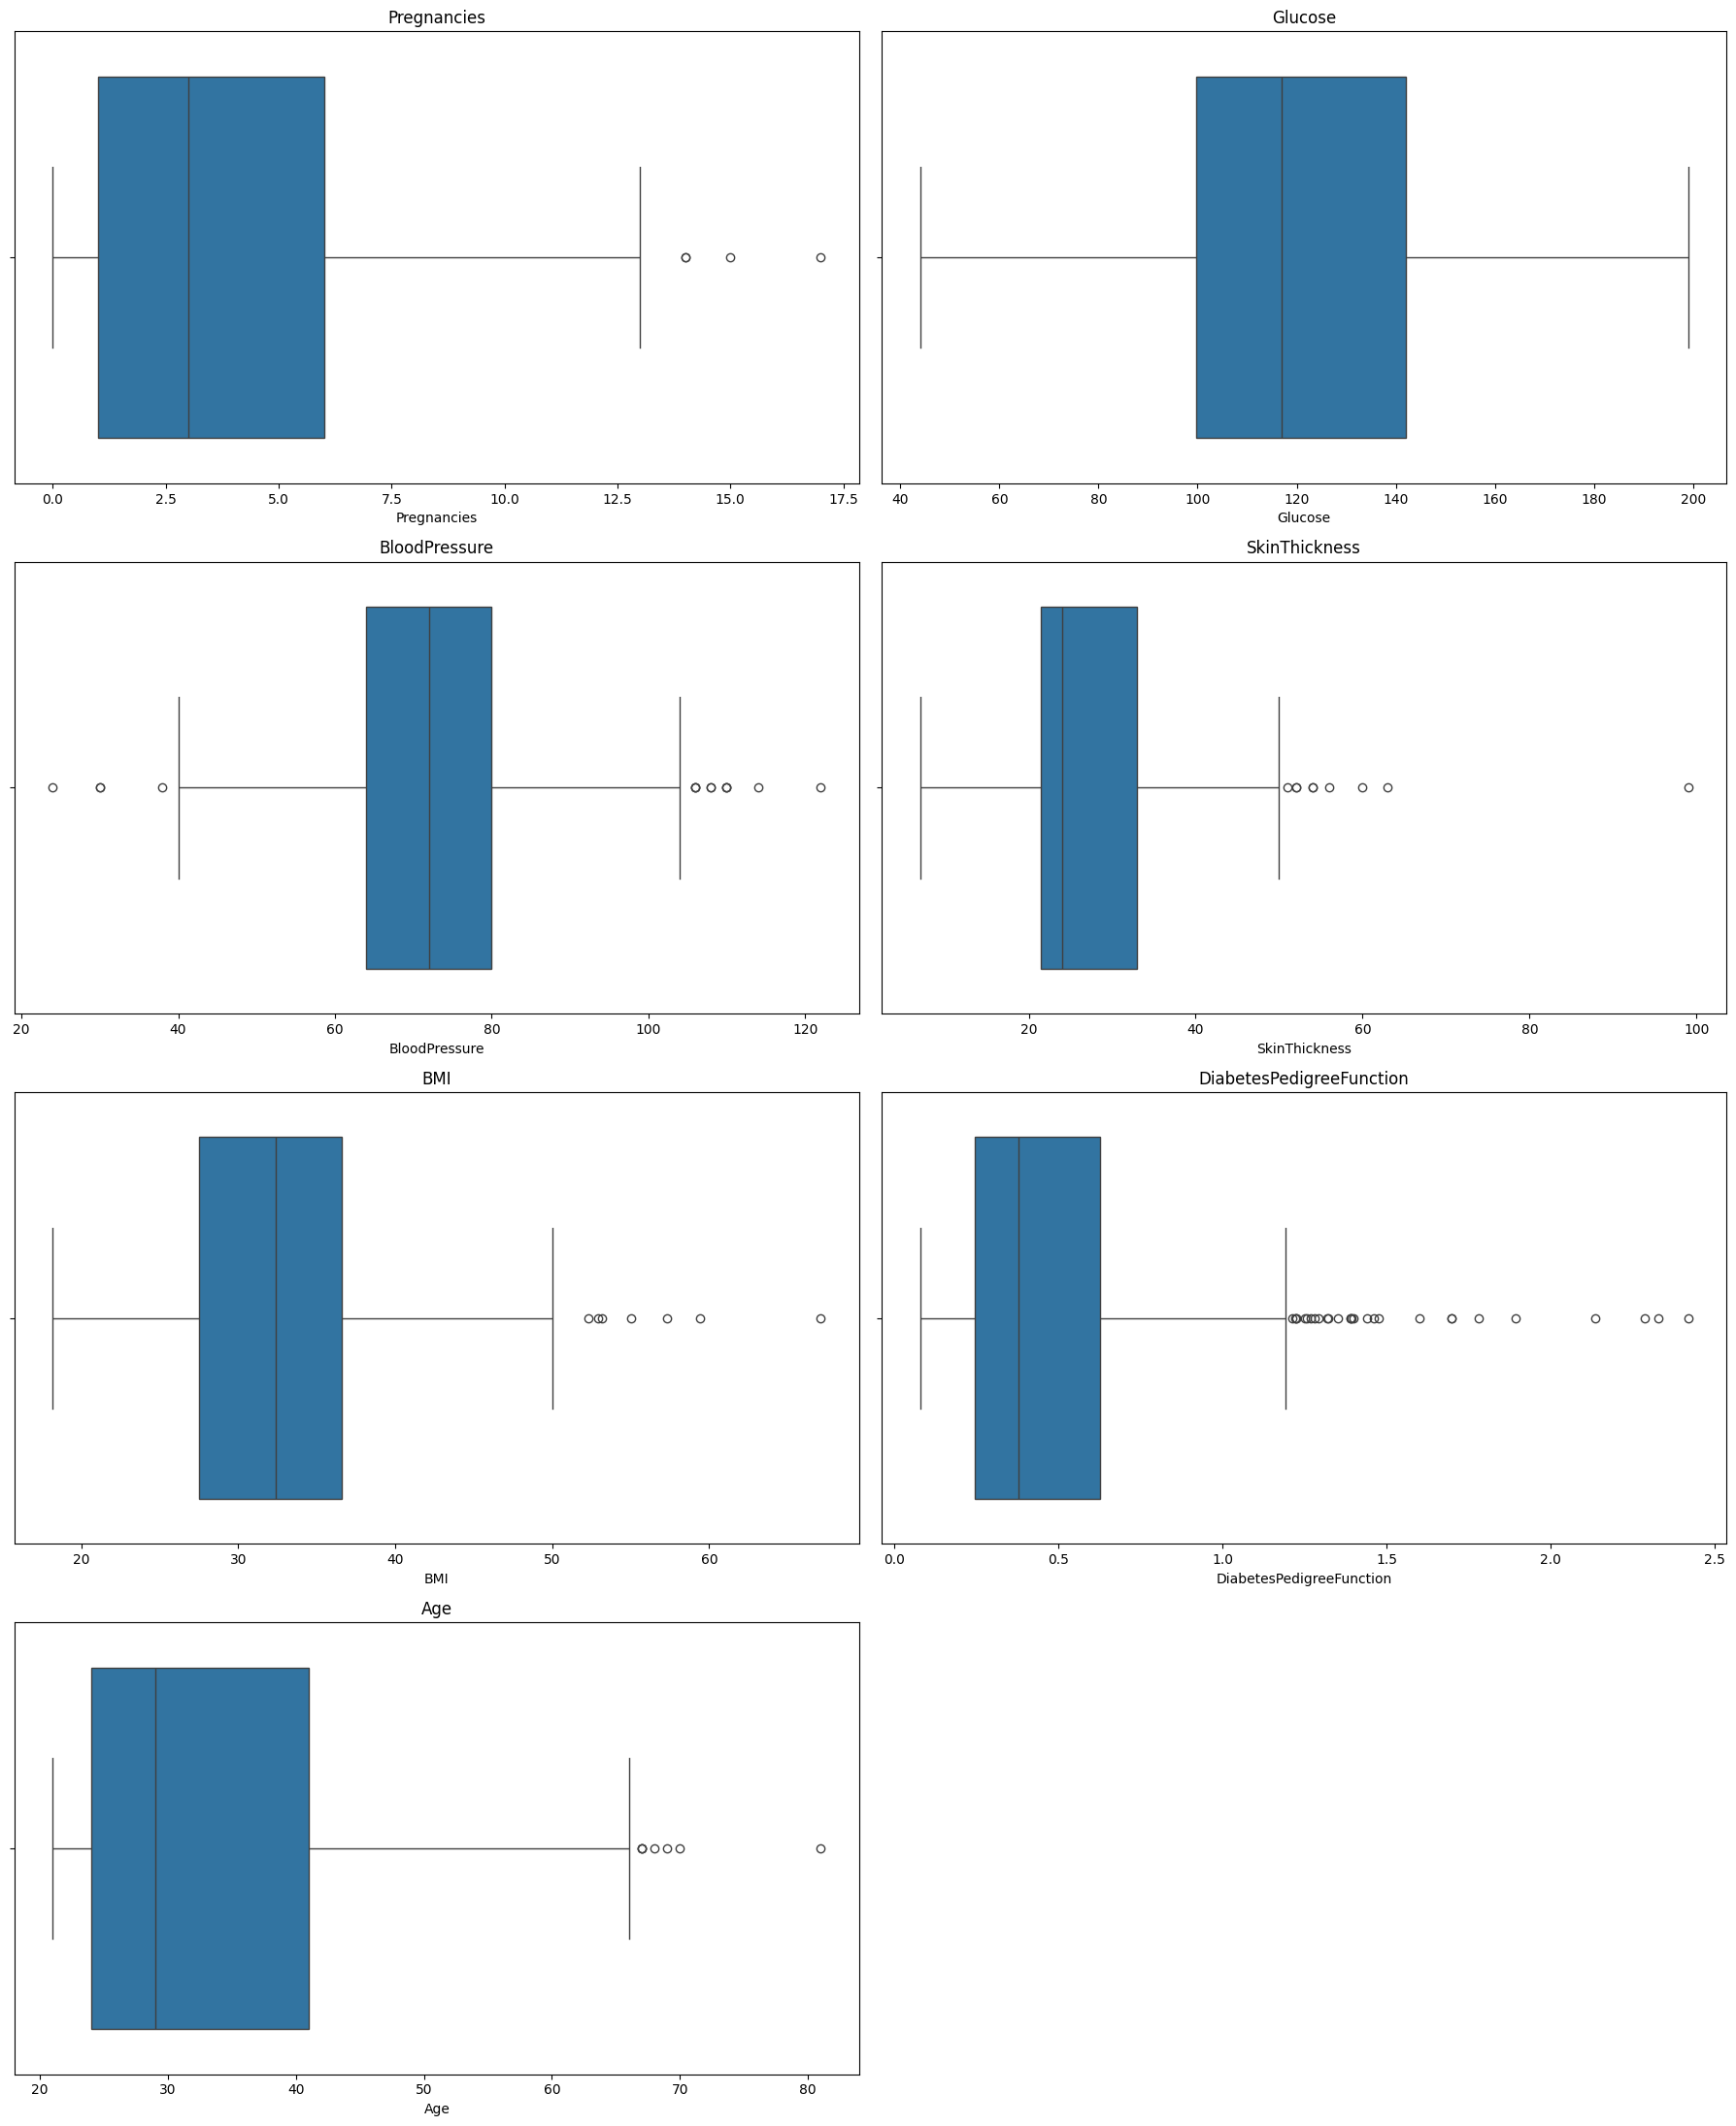

In [327]:
# Select numerical columns
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age']
# Crear un gráfico de subplots de 4x2 con tamaño de figura 18x22 pulgadas
fig, ax = plt.subplots(4, 2, figsize=(18, 22))

# Aplanar el array de ejes para facilitar la iteración
ax = ax.flatten()

# Iterar sobre las columnas numéricas y crear un boxplot para cada una
for idx, column in enumerate(numerical_columns):
    sns.boxplot(ax=ax[idx], x=diabetes_cleaned[column])
    ax[idx].set_title(column)

# Eliminar el subplot vacío (octavo gráfico no usado)
fig.delaxes(ax[-1])

# Ajustar diseño para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### ✏️ Actividad BONUS: Análisis de Outliers con Boxplots
Ejecuta el código anterior para visualizar los boxplots de las variables en el dataset `diabetes_cleaned`. Luego, responde las siguientes preguntas:

1️⃣ ¿Qué variable tiene más **outliers**? ¿Por qué crees que sucede esto?

2️⃣ ¿Cómo interpretarías los outliers en la variable `Insulin`? ¿Deberían ser eliminados o tratados de otra manera?

3️⃣ ¿Qué variables muestran una distribución más simétrica sin valores atípicos?

4️⃣ Si estuvieras preparando este dataset para un modelo de Machine Learning, ¿qué harías con los outliers?

💡 **Escribe tus respuestas en la celda siguiente y justifica con base en los gráficos generados.**

### Bonus x2 Solucionar exportación de html

In [328]:
#%pip install nbconvert
#%pip install pandoc